# ASSIGNMENT 1
Using Keras to build a CNN network for CIFAR-10 dataset. Each record is of size
1*3072. Building a CNN network to classify the data into the 10
classes.

# Dataset
CIFAR-10 dataset The CIFAR-10 dataset consists of 60000 32x32 colour images in 10 classes, with 6000 images per class. There are 50000 training images and 10000 test images.

The dataset is divided into five training batches and one test batch, each with 10000 images. The test batch contains exactly 1000 randomly-selected images from each class. The training batches contain the remaining images in random order, but some training batches may contain more images from one class than another. Between them, the training batches contain exactly 5000 images from each class.

http://www.cs.utoronto.ca/~kriz/cifar.html

# Importing libraries

In [0]:
from __future__ import print_function
import keras
from keras.datasets import cifar10
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten
from keras.layers import Conv2D, MaxPooling2D
from keras.utils import plot_model 
import os


# Loading the CIFAR 10 dataset

In [0]:
batch_size = 32
num_classes = 10
epochs = 60
data_augmentation = True
num_predictions = 20
save_dir = os.path.join(os.getcwd(), 'saved_models')
model_name = 'keras_cifar10_trained_model.h5'

# The data, split between train and test sets:

In [54]:
(x_train, y_train), (x_test, y_test) = cifar10.load_data()
print('x_train shape:', x_train.shape)
print(x_train.shape[0], 'train samples')
print(x_test.shape[0], 'test samples')

x_train shape: (50000, 32, 32, 3)
50000 train samples
10000 test samples


# Convert class vectors to binary class matrices.

In [0]:
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)

# Defining the model

In [0]:
model = Sequential()
model.add(Conv2D(32, (3, 3), padding='same',
                 input_shape=x_train.shape[1:]))
model.add(Activation('relu'))
model.add(Conv2D(32, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.5))


In [0]:
model.add(Conv2D(64, (3, 3), padding='same'))
model.add(Activation('relu'))
model.add(Conv2D(64, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.5))


In [0]:
model.add(Flatten())
model.add(Dense(128))
model.add(Activation('relu'))
model.add(Dropout(0.5))
model.add(Dense(num_classes))
model.add(Activation('softmax'))

# Initiating RMSprop optimizer

In [0]:

opt = keras.optimizers.rmsprop(lr=0.0001, decay=1e-6)

# Training the model using RMSprop

In [0]:
model.compile(loss='categorical_crossentropy',
              optimizer=opt,
              metrics=['accuracy'])


In [0]:
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train /= 255
x_test /= 255

# Fitting the model


In [62]:
history = model.fit(x_train, y_train,
              batch_size=batch_size,
              epochs=epochs,
              validation_data=(x_test, y_test),
              shuffle=True)

Train on 50000 samples, validate on 10000 samples
Epoch 1/60
50000/50000 [==============================] - 22s 444us/step - loss: 2.0321 - acc: 0.2390 - val_loss: 1.7067 - val_acc: 0.3940
Epoch 2/60
50000/50000 [==============================] - 21s 429us/step - loss: 1.6942 - acc: 0.3737 - val_loss: 1.5299 - val_acc: 0.4501
Epoch 3/60
50000/50000 [==============================] - 20s 403us/step - loss: 1.5415 - acc: 0.4386 - val_loss: 1.3793 - val_acc: 0.4982
Epoch 4/60
50000/50000 [==============================] - 20s 401us/step - loss: 1.4554 - acc: 0.4741 - val_loss: 1.3112 - val_acc: 0.5363
Epoch 5/60
50000/50000 [==============================] - 20s 399us/step - loss: 1.3936 - acc: 0.4994 - val_loss: 1.2776 - val_acc: 0.5385
Epoch 6/60
50000/50000 [==============================] - 20s 398us/step - loss: 1.3438 - acc: 0.5209 - val_loss: 1.2177 - val_acc: 0.5692
Epoch 7/60
50000/50000 [==============================] - 20s 403us/step - loss: 1.2962 - acc: 0.5408 - val_loss: 1.

# Scoring  and Evaluating trained model.

In [63]:
scores = model.evaluate(x_test, y_test, verbose=1)
print('Test loss:', scores[0])
print('Test accuracy:', scores[1])

10000/10000 [==============================] - 1s 139us/step
Test loss: 0.7423428938865662
Test accuracy: 0.7546


# Printing the accuracy

In [64]:
scores = model.evaluate(x_test, y_test, verbose=0)
print("Accuracy: %.2f%%" % (scores[1]*100))

Accuracy: 75.46%


# Plot training & validation accuracy values

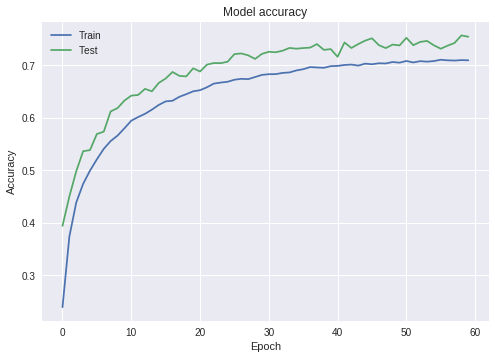

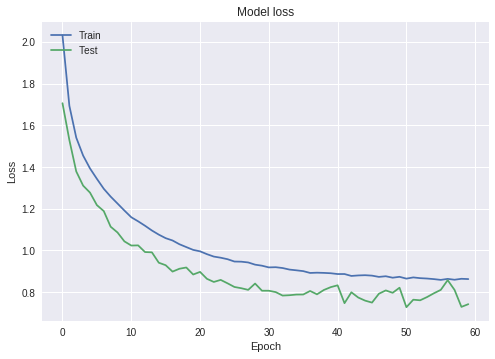

In [65]:
import matplotlib.pyplot as plt
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

# Plot training & validation loss values
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

In [0]:
# plot graph
plot_model(model, to_file='convolutional_neural_network.png')

Results
1) Provide a recommendation for the best model you would recommend for classification. Which model (with parameter values) would you choose and why? 
According to me, the best model for classification is cnn model 1. The best parameters that helped improve the model are: 
epochs = 60 
batch_size = 32
keep_probability = 0.7 
learning_rate = 0.001 
Optimizer

• Comment on how good your model is ? Does it overfit/underfit data ? What could you do to improve the model I ran it for 60 epochs and got almost 75.46% accuracy. It can surely go much further since it was still undertrained! To improve the model the learning rate should be improved. Also, number of neurons can be more complicated for a better fit.

#References
[1] https://github.com/fchollet/keras/blob/master/examples/cifar10_cnn.py

[2] http://www.cs.utoronto.ca/~kriz/cifar.html

[3] https://towardsdatascience.com/cifar-10-image-classification-in-tensorflow-5b501f7dc77c